# Hypothesis Testing Notebook Walkthrough

In [4]:
# setup

# importing for later use
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pydataset import data


# NOTEBOOK WALKTHROUGH 

In [5]:
plt.rc('figure', figsize=(16, 9))
plt.rc('axes.spines', top=False, right=False)
plt.rc('patch', ec='black', force_edgecolor=True)
plt.rc('font', size=13)

np.random.seed(13)

In [6]:
# Simulation Based Approach
# Example: Codeup starts producing a scratch off lottery ticket called "Golden Codys". The odds of winning a prize must be advertised to the state, and since we are manufacturing the tickets, we know exactly how many winners and losers there are.
# Theory: Our population is the 1000 tickets we have manufactured
# Implementation: Create a boolean pandas Series we model win with true and lose with false
# because of this, we can take the mean of a series to measure the likelihood of winning

The actual probability of winning is 0.25


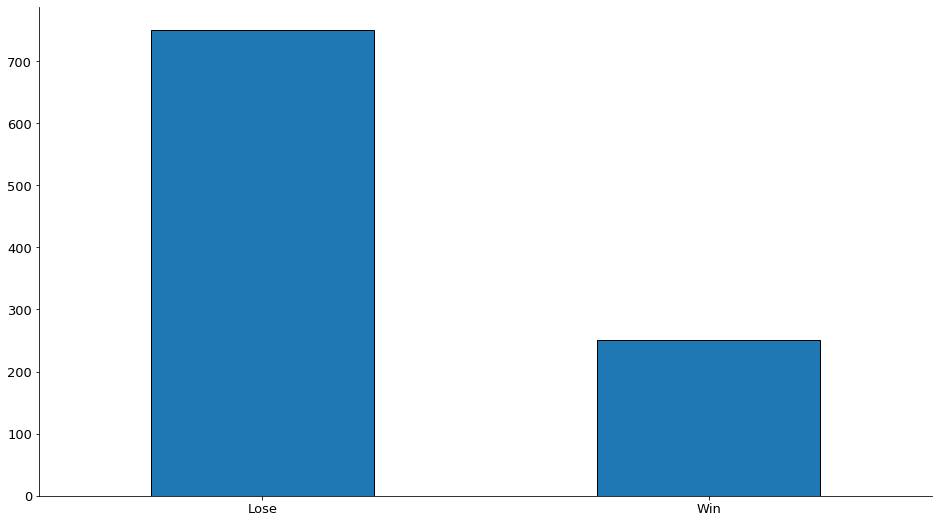

In [4]:
# creating series that represent winning and losing tickets 
lotterytickets = pd.Series([True] * 250 + [False] * 750)

# creating bar plot the displays the amount of winning and losing tickets
lotterytickets.value_counts().set_axis(['Lose', 'Win']).plot.bar()
plt.xticks(rotation=0)

# display average of winning (true) tickets ie. odds of winning per ticket
print(f'The actual probability of winning is {lotterytickets.mean()}')

In [5]:
# Scenario: Each student in a classroom is given a Golden Cody scratch off at random 

# Theory: We we take a random sample and calculate the win rate, we won't expect to see exactly 25% 
# even though we know that is what the overall rate is.

# Examples of biased samples:
# non-response: people that don't respond are a diff population
# undercoverage: some groups aren't well represented
# voluntary: people volunteer for surveys
# leading questions
# social desirability

# Implementation: Use the .sample method on our series to randomly choose 25 tickets, 
# representing 25 students in a classroom. 
# Use .mean to calculate what percentage of the values are True, or are winning tickets.

# setting number of tickets for sample to 25
n_tickets = 25

# taking sample of 25 tickets and finding percent of winning tickets (ie. average chance of winning from a random ticket in the sample)
lotterytickets.sample(n_tickets).mean()

0.12

In [6]:
# Scenario: each student in 4 different cohorts is given a Golden Codys scratch off ticket, 
# we want to calculate the win rate for each classroom.
# Theory: it is unlikely any classroom will have exactly a 25% winrate, 
# instead we will see slightly different numbers for each classroom.
# Implementation: loop through a range of 5 to get a sample and calculate the winrate 5 times. 
# Each of the 5 numbers produced represents the calculated winrate for one classroom of 25 students.

# creating list of average percent of winning tickets after taking 5 samples of 25 tickets
[lotterytickets.sample(n_tickets).mean() for num in range(5)]

[0.28, 0.28, 0.08, 0.24, 0.36]

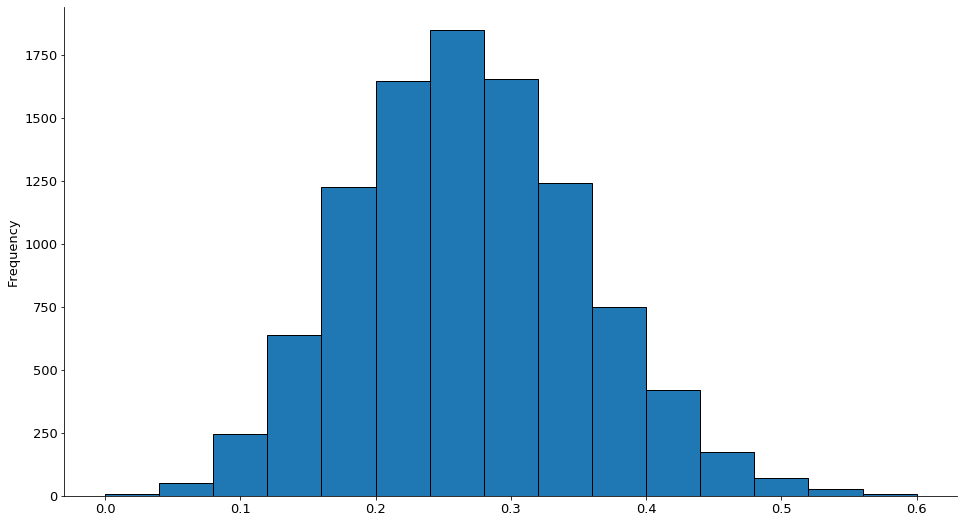

In [7]:
# Theory: The winrates we see aren't ever exactly 25%, but we would expect the rate to be closer to 25% 
# than further away. That is, it is more likely that a classroom will come up with a win rate of 24% 
# than a winrate of 10%.

# If we were to repeat this experiment a whole bunch of times, say 10,000, we would find 
# that the calculated winrates are, in fact, normally distributed.

# That is, we would expect the calculated average winrate for a classroom to follow a normal distribution, 
# even though the underlying random process is not based on a normal distribution

# Implementation: To visualize this, we'll create a series full of calculated winrates for 10,000 classrooms, 
# each classroom made up of 25 students. 
# That is, we will simulate 10,000 classrooms of 25 students getting Golden Codys 
# and calculate the average winrate for each of the 10,000 classrooms.

# creating series with 10000 values, each represents the mean found in a sample of 25 tickets 
# can also represent the average winrate among 10,000 classes that each recieved 25 tickets
calc_winrates = pd.Series([lotterytickets.sample(n_tickets).mean() for num in range(10000)])

# plotting as histogram
calc_winrates.plot.hist(bins=15)

In [8]:
# Theory

# The above visual represents the sampling distribution for the winrate of Golden Codys, based on a class of 25.

# The Central Limit Theorm says that sampling distribution will be normally distributed even if 
# the underlying random variable isn't.

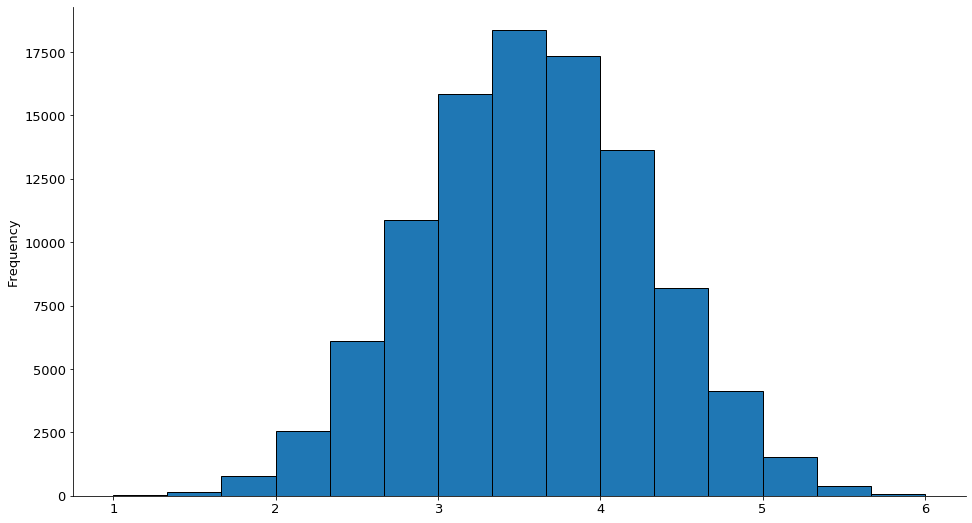

In [9]:
# Mini Exercise -- CLT
# Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
# Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. 
# Store each of the 10,000 averages in a list.
# Plot the distribution of the calculated averages. 
# What do you notice about the shape of the distribution of calculated averages? 

# creating 100000 simulations of 6 dice being rolled
rolls = np.random.choice([1,2,3,4,5,6], [100000 , 6])

# finding the avg of each simulation results
roll_avg = pd.Series(rolls.mean(axis = 1))

# plotting as histogram
roll_avg.plot.hist(bins=15)

# Answer: It is a normal distribution.


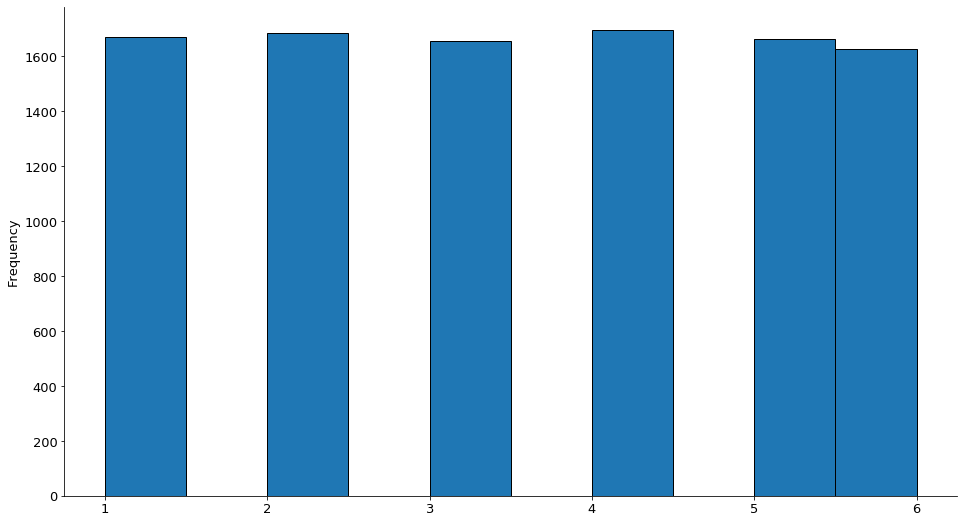

In [10]:
# What kind of distribution is the underlying random variable (i.e. one dice roll?)

# creating 10000 simulations of one die being rolled
single_rolls = np.random.choice([1,2,3,4,5,6], [10000 , 1])

# converting to series, don't need to use mean since there is only one value per roll
single_roll_avg = pd.Series(single_rolls.sum(axis = 1))

# plotting as histogram
single_roll_avg.plot.hist(15)

# Answer: It is a uniform distribution.

In [11]:
# Theory: in practice, we won't have 10,000 samples to work with, but rather just 1. 
# We can stil rely on the sampling distribution being normally distributed, and this has some intersting properties.
# the mean of the sampling distribution of the sample means will be the "true" mean
# the variance of the sampling distribution is the population variable divided by the sample size
# the standard deviation of the sampling distribution is pqn‾‾‾√ (for our example), aka the standard error

se = sqrt((.25 * .75) / n_tickets)

# Let's compare our calculated standard error (i.e. the standard deviation of the sample means) to the 
# experimental value:

# Let's compare our calculated standard error (i.e. the standard deviation of the sample means) 
# to the experimental value:

print('SE:                 %.4f' % se)
print('sample_means.std(): %.4f' % calc_winrates.std())

SE:                 0.0866
sample_means.std(): 0.0857


In [12]:
# That the sampling distribution being normally distributed is very powerful and has important implications:

# confidence intervals for population parameter estimates (e.g. estimating the population mean)
# as n goes up, interval becomes smaller
# as certainty goes up, interval becomes larger
# 99% of calculated CIs will contain the true mean (e.g. if we ran simulations and re-sampled, 99% of the simulations' calculated CIs would contain the true mean)
# hypothesis testing
# One classroom calculates their winrate at 20% and claims the tickets were distributed unfairly. 
# What is the likelihood we observe a 20% (or smaller) winrate just due to chance?

# finding mean and sdev 
mean = calc_winrates.mean()
sd = calc_winrates.std()

# finding probability of a classroom having a batch of tickets with a winrate of 20% or lower
# since the probability is 28%, this is very far from an alpha value of .05 so we know its reasonable
# to expect that they could have this win percentage
stats.norm(mean, sd).cdf(.2)

# The probability we've calculated is a p-value. 
# The likelihood that we observe the data that we have if the null hypothesis is true.

0.28283511827393837

In [13]:
# Null and Alternative Hypothesis
# H0 : status quo: no difference or no effect
# Ha : alternative: there is a difference or effect
# whether Ha is ≠ , <, >, determines one-tailed vs two-tailed test
# < or > == one-tailed
# ≠ == two-tailed

In [14]:
# Mini Exercise -- Null + Alternate Hypothesis and Errors
# For each of the following scenarios: refine the question, generate a null and alternative hypothesis, 
# and give examples of true positives, true negatives, type I and type II errors.

In [15]:
# 1) Are the average grades in web development vs data science classes different?

# Q: Are the average grades in the WD class significantly different than the average grades of the DS class?
# N0: There is no difference between the average grades of the WD and DS classes
# Na: There is a significant difference between the average grades of the WD and DS classes

# TP: We conclude that there is a significant difference in grades between the WD and DS classes and there is a difference.

# TN: We conclude that there is no significant difference in grades between the WD and DS classes and there is no difference. 

# Type I: We conclude that there is a significant difference in grades between the WD and DS classes and there is no difference. 

# Type II: We conclude that there is no significant difference in grades between the WD and DS classes and there is a difference. 


In [16]:
# Is there a relationship between how early a student shows up to class and their grade?

# Q: Is there a difference the average grades of students who show up to class prior to 9AM (early) and those who show up at or later than 9am (not early)?
# N0: There is no difference in the average grades of students who show up early and those who dont show up early
# Na: There is a difference in the average grades of students who show up early and those who dont show up early

# TP: We conclude that there is a difference in the average grades of students who show up early and those who dont show up early and there is a difference

# TN: We conclude that there is no difference in the average grades of students who show up early and those who dont show up early and there is no difference

# Type I: We conclude that there is a difference in the average grades of students who show up early and those who dont show up early and there is no difference

# Type II: We conclude that there is no difference in the average grades of students who show up early and those who dont show up early and there is a difference

In [17]:
# Are web dev or data science students more likely to be coffee drinkers?

# Q: Is there a significant difference between the average percent of coffee drinkers in the WD and DS classes?
# N0: There is no significant difference between the average percent of coffee drinkers in the WD and DS classes?
# Na: There is a significant difference between the average percent of coffee drinkers in the WD and DS classes?

# TP: We conclude that there is a significant difference between the average percent of coffee drinkers in the WD and DS classes and there is

# TN: We conclude that there is no significant difference between the average percent of coffee drinkers in the WD and DS classes and there is not

# Type I: We conclude that there is a significant difference between the average percent of coffee drinkers in the WD and DS classes and there is not

# Type II: We conclude that there is no significant difference between the average percent of coffee drinkers in the WD and DS classes and there is

In [18]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 
# then give an example of what a true positive, true negative, type I and type II errors would look like. 
# Note that some of the questions are intentionally phrased in a vague way. 
# It is your job to reword these as more precise questions that could be tested.

# HYPOTHESIS TESTING OVERVIEW QUESTIONS

In [19]:
# Has the network latency gone up since we switched internet service providers?

# Q: Has the amount of latency we experience significantly increased since we switched internet service providers?
# N0: the amount of latency we experience has not significantly increased since we switched internet service providers
# Na: the amount of latency we experience has significantly increased since we switched internet service providers

# TP: We conclude that the amount of latency we experience has  significantly increased since we switched internet service providers and it has

# TN: We conclude that the amount of latency we experience has not significantly increased since we switched internet service providers and it has not

# Type I: We conclude that the amount of latency we experience has significantly increased since we switched internet service providers and it has not

# Type II: We conclude that the amount of latency we experience has not significantly increased since we switched internet service providers when it has

In [20]:
# Is the website redesign any good?

# Q: Has the average amount of click-throughs we receive on average increased since the website redesign?
# N0: The average amount of click-throughs we receive on average has not increased since the website redesign
# Na: The average amount of click-throughs we receive on average has increased since the website redesign

# TP: We conclude that the average amount of click-throughs we receive on average has increased since the website redesign and it has

# TN: We conclude that the average amount of click-throughs we receive on average has not increased since the website redesign and it has not

# Type I: We conclude that the average amount of click-throughs we receive on average has increased since the website redesign and it has not

# Type II: We conclude that the average amount of click-throughs we receive on average has not increased since the website redesign and it has

In [21]:
# Is our television ad driving more sales?

# Q: Has our average amount of sales increased since our new television ad aired?
# N0: Our average amount of sales has not increased since our new television ad aired
# Na: Our average amount of sales has increased since our new television ad aired

# TP: We conclude that our average amount of sales has increased since our new television ad aired and it has

# TN: We conclude that our average amount of sales has not increased since our new television ad aired and it has not

# Type I: We conclude that our average amount of sales has increased since our new television ad aired and it has not

# Type II: We conclude that our average amount of sales has not increased since our new television ad aired and it has

# T-TEST

# QUESTION

In [22]:
# Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
# A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
# A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
# Use a .05 level of significance.

# H0 = Avg time to sell homes for office 1  is the same as office 2
# Ha = Avg time to sell homes for office 1  is not the same as office 2

# setting mean, sdev and n (number of samples) of office 1
m1 = 90
s1 = 15
n1 = 40

# setting mean, sdev and n (number of samples) of office 2
m2 = 100
s2 = 20
n2 = 50

# setting degrees of freedom
degf = n1 + n2 - 2

# setting sp value
s_p = sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))

# setting standard error
standard_error = se = sqrt(s1**2 / n1 + s2**2 / n2)

# calculating t value
t = (m1 - m2) / (s_p * sqrt(1/n1 + 1/n2))

# calculating p value
p = stats.t(degf).cdf(t) * 2

# printing results
print(t, p)

# ALTERNATE SOLUTION
# office1 = np.random.normal(90,15,40)
# office2 = np.random.normal(100,20,50)
# t, p = stats.ttest_ind(office1, office2, equal_var = False)

# t, p

-2.6252287036468456 0.01020985244923939


# QUESTION

In [23]:
# Load the mpg dataset and use it to answer the following questions:

# loading dataset
mpg = data('mpg')

# examining the data
mpg.head(5)


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [24]:
# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

# Set hypothesis
# H0: Fuel efficiency of cars from 2008 equals that of cars from 1999
# Ha: Fuel efficiency of cars from 2008 does not equal that of cars from 1999

# removing null values from relevant columns
mpg = mpg[~mpg['year'].isna()]
mpg = mpg[~mpg['cty'].isna()]
mpg = mpg[~mpg['hwy'].isna()]

# adding column that holds average overall mpg between highway and city
mpg = mpg.assign(mpg_avg = (mpg.cty + mpg.hwy) / 2)

# creating 2 sepearate series that hold the avg mpgs of cars with years 1999 and 2008 respectively
cars1999 = mpg[mpg.year == 1999].mpg_avg
cars2008 = mpg[mpg.year == 2008].mpg_avg


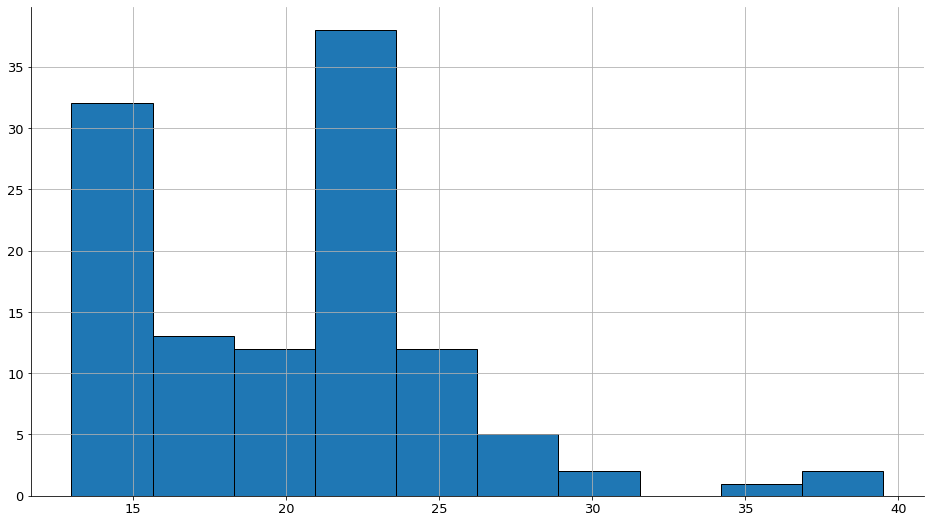

In [25]:
# plotting 1999 mpg info
cars1999.hist()

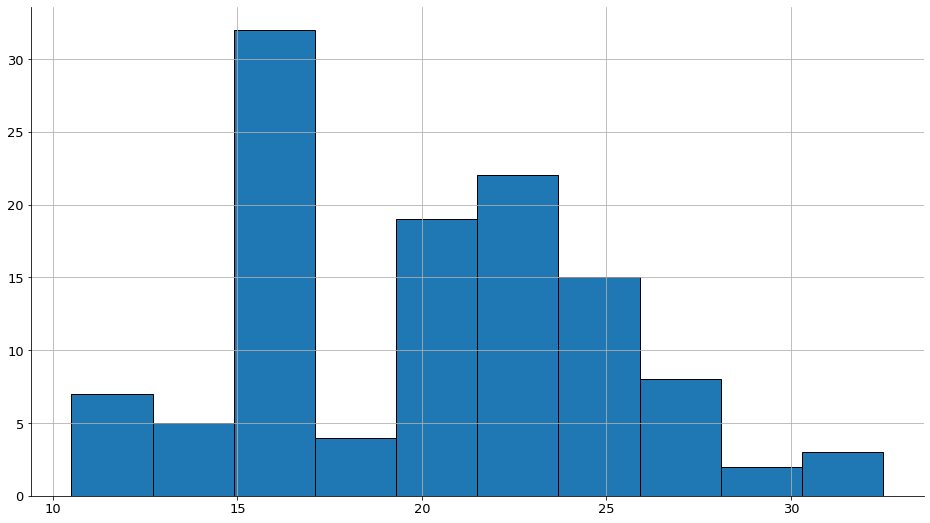

In [26]:
# plotting 2008 mpg info
cars2008.hist()

In [27]:
# Verify Assumptions

# Independent Samples (n.a. for 1-sample t-test). 
# Yes, there are no cars from 2008 in the 1999 data

# Normal Distribution, or at least 30 observations and "kinda" normal. 
# Yes, there are a lot more than 30 observations of each year of car

# checking variance difference
print(cars2008.var())
print(cars1999.var())

# Variances are different so we will use equal_var = False

24.097480106100797
27.122605363984682


In [28]:
# calculating t and p 
t, p = stats.ttest_ind(cars2008, cars1999, equal_var = False)

# displaying results
print (f't = {t} \np = {p}')

# Since p > .05, we do no reject the null hypothesis

t = -0.21960177245940962 
p = 0.8263750772060638


# QUESTION

In [29]:
# Are compact cars more fuel-efficient than the average car?
# IMPORTANT NOTE: defining 'average car' as all automobiles in dataset since the only cars that could be reasonably described
# average are midsize and that would be too similar to the last question + I'd like to try a 1-sample t-test :^D

# Create hypothesis
# H0: MPG of compact cars = MPG of average (all) cars
# Ha: MPG of compact cars > MPG of average (all) cars

# removing nulls from class column
mpg = mpg[~mpg['class'].isna()]

# creating series' that contain the mpg_avg values for compact cars and all cars in dataset respectively
compact_mpg = mpg[mpg['class'] == 'compact'].mpg_avg
normal_car_mpg = mpg.mpg_avg


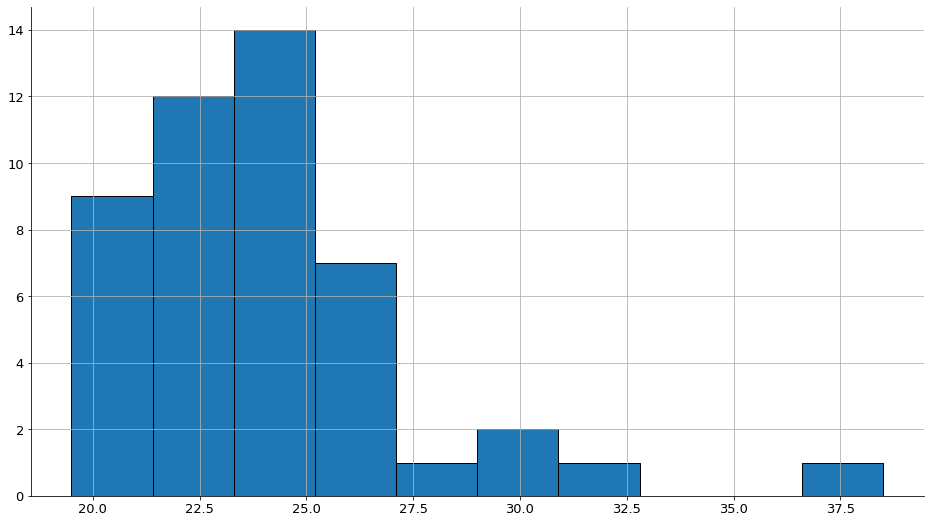

In [30]:
# plot histogram of compact cars mpgs
compact_mpg.hist()

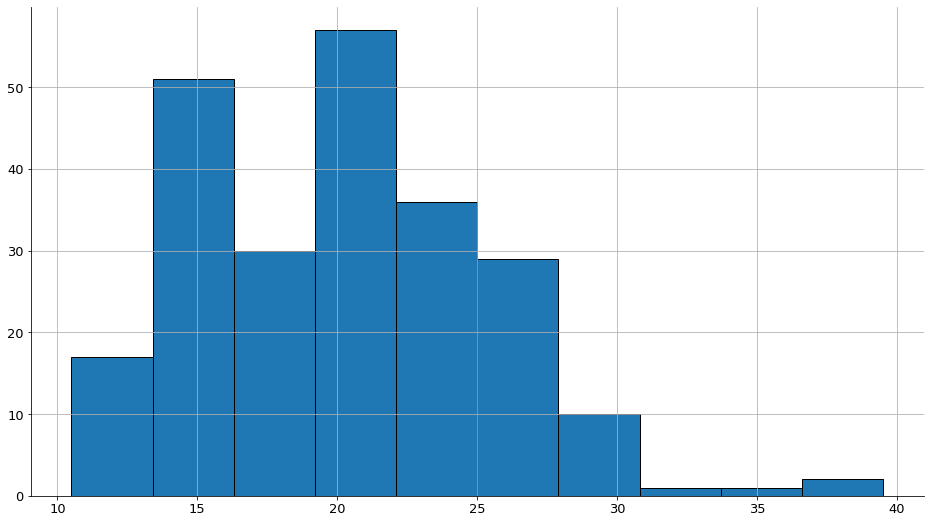

In [31]:
# plot histogram of all cars avg mpgs
normal_car_mpg.hist()

In [32]:
# verify assumptions

# Enough observations or a normal distribution?
# Yes, 30+ observations

In [33]:
# creating variable equal to mean of all cars mpg
normal_car_mpg_mean = normal_car_mpg.mean()

# calculating t and p
# note were passing array like for subgroup but a float mean for the population
t, p = stats.ttest_1samp(compact_mpg, normal_car_mpg_mean)

# displaying results, dividing p by 2 because this is a 1 tail test
print(t, p/2)

# Answer: p < 0 and t > 0 so we reject null hypothesis

7.896888573132535 2.0992818971585668e-10


# QUESTION

In [34]:
# Do manual cars get better gas mileage than automatic cars?

# set hypothesis
# Create hypothesis
# H0: MPG of manual cars = MPG of automatic cars
# Ha: MPG of manual cars > MPG of automatic cars

# remove null value from trans column
mpg = mpg[~mpg['trans'].isna()]

# new column transcat holds value of auto or manual
# if trans value starts with a, column will show auto, otherwise manual
mpg['trans_cat'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')

In [35]:
# creating 2 series that contain the mpg_avg of manual and automatic transmission cars respectively
manual_mpg = mpg[mpg['trans_cat'] == 'manual'].mpg_avg
auto_mpg = mpg[mpg['trans_cat'] == 'auto'].mpg_avg


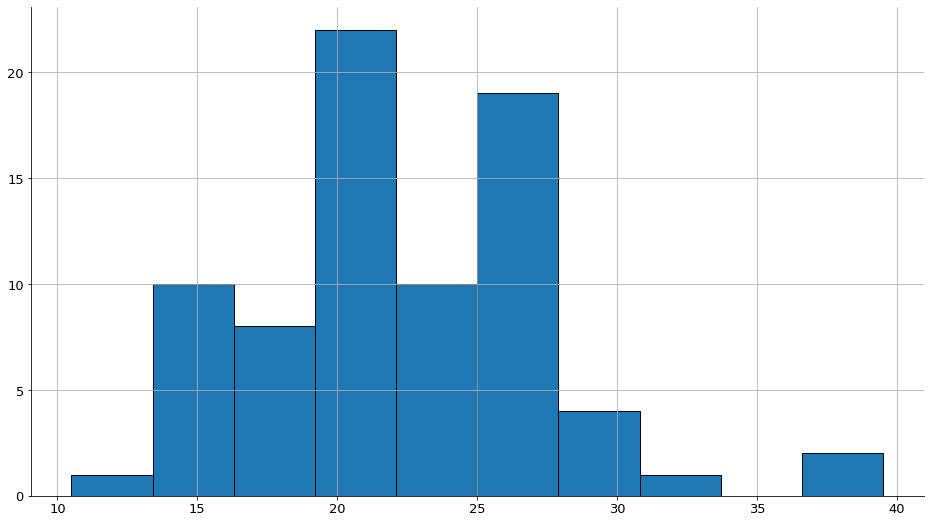

In [36]:
# plot histogram of manual transmissions

manual_mpg.hist()

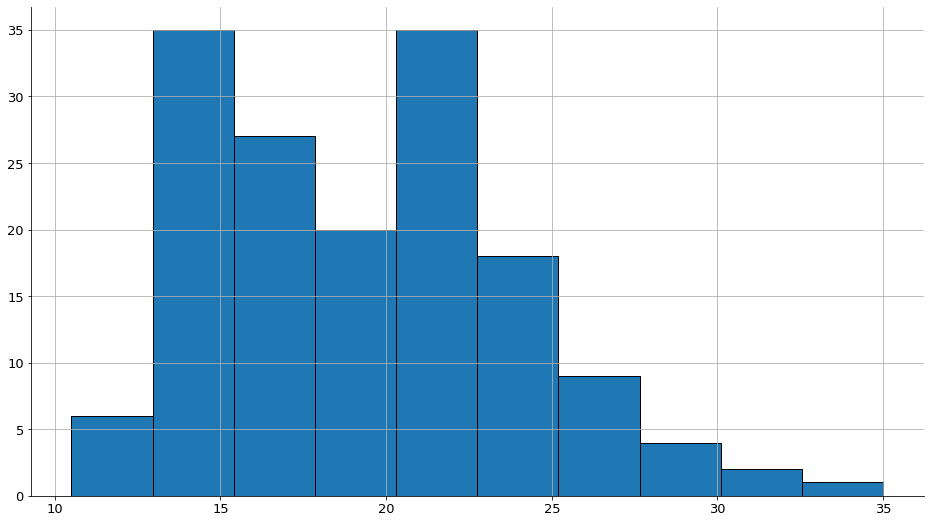

In [37]:
auto_mpg.hist()

In [38]:
# Verify Assumptions

# Independent Samples (n.a. for 1-sample t-test). 
# Yes, there are no manual cars in the automatic data

# Normal Distribution, or at least 30 observations and "kinda" normal. 
# Yes, there are a lot more than 30 observations of each type of car

# checking variance difference
print(auto_mpg.var())
print(manual_mpg.var())

# Variances are different so we will use False for equal_var argument

21.942777233382337
26.635167464114826


In [39]:
t, p = stats.ttest_ind(manual_mpg, auto_mpg, equal_var = False)
# cutting p in half bc its a 1 tailed test
print(t, p/2)

# Answer: Because p < .05 (alpha) and t > 0, we reject null hypothesis

4.443514012903071 8.976124499958965e-06


# CORRELATIONS

In [40]:
# Use the telco_churn data.

# reading in telco data as dataframe
df = pd.read_csv('telco.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# QUESTION

In [41]:
# Does tenure correlate with monthly charges? 

# hypothesis
# H0: There is no linear correlation between tenure and monthly charges
# Ha: There is a linear correlation between tenure and monthly charges

# assigning columns to variables as series
x = df.tenure
y = df.MonthlyCharges

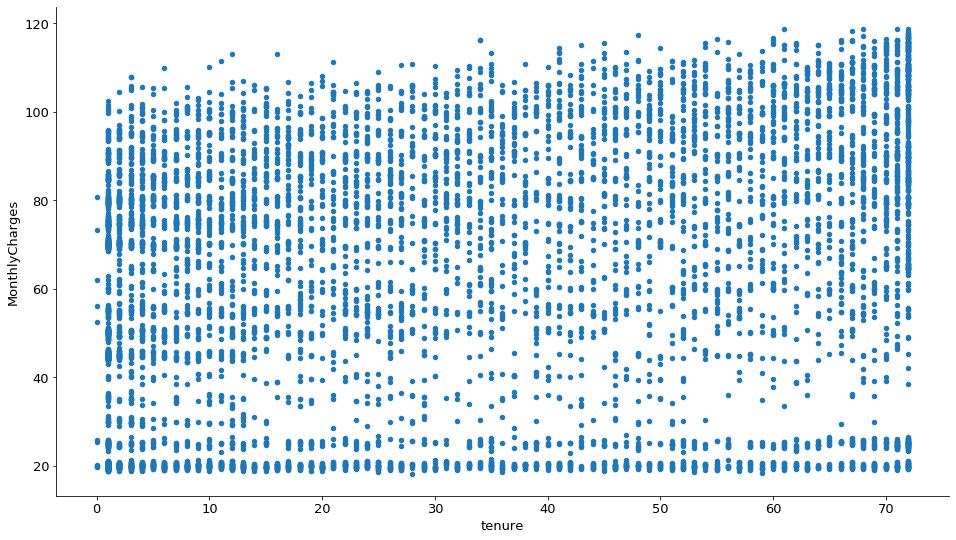

In [42]:
# plotting data
df.plot.scatter(x = 'tenure', y = 'MonthlyCharges')


In [43]:
# using pearsonr to find the correlation value and p
r, p = stats.pearsonr(x, y)

print(r, p)

# Answer: p < alpha so we reject the null hypothesis. we conclude tenure does have a linear relationship with monthly charges. 
# With regard to r, because it positive and not that far above 0, there is a weak, positive relationship.

0.24789985628615002 4.0940449915016345e-99


# QUESTION

In [44]:
# Total charges? 

# hypothesis
# H0: There is no linear correlation between tenure and total charges
# Ha: There is a linear correlation between tenure and total charges

# replacing empty values in totalCharges with 0
df['TotalCharges'] = df.TotalCharges.fillna(0)

# assigning columns to variables as series
x = df.tenure
y = df.TotalCharges


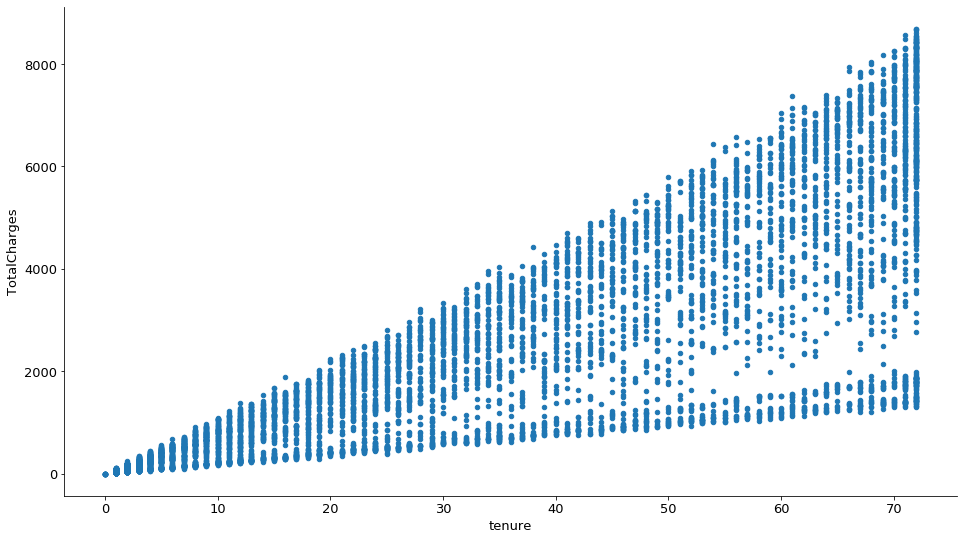

In [45]:
# plotting data
df.plot.scatter(x = 'tenure', y = 'TotalCharges')

In [46]:
# using pearsonr to find the correlation value and p
r, p = stats.pearsonr(x, y)

#display results
print(r, p)

# Answer: p < alpha so we reject the null hypothesis. we conclude tenure does have a linear relationship with total charges. 
# With regard to r, because it positive close to 1, there is a strong, positive relationship.

0.8261783979502421 0.0


# QUESTION

In [47]:
# What happens if you control for phone?

# Hypothesis
# H0: There is no linear relationship between total charges and tenure for customers with phone service
# Ha: There is a linear relationship between total charges and tenure for customers with phone service

# create data frames for customers with and without phone service
phone = df[df.PhoneService == 'Yes']
nophone = df[df.PhoneService == 'No']

In [48]:
# using pearsonr to find the correlation value and p for customers with phones
r, p = stats.pearsonr(phone.TotalCharges, phone.tenure)

print(r, p)

0.8301076972900363 0.0


In [49]:
# using pearsonr to find the correlation value and p for customers without phones
r, p = stats.pearsonr(nophone.TotalCharges, nophone.tenure)

print(r, p)

0.9535697728407464 0.0


In [50]:
# Answer: p < alpha for customers with and without phones. We reject the null hypothesis.
# due the to r values being close to 1, we find there is a strong linear relation between total charges and tenure
# regardless of whether they have a phone

# QUESTION

In [51]:
# What happens if you control for internet service?

# Hypothesis
# H0: There is no linear relationship between total charges and tenure for customers with internet
# Ha: There is a linear relationship between total charges and tenure for customers with internet

# add column to dataframe that tells whether customer has internet service or not
df['internetYN'] = np.where(df.InternetService.str.startswith('N'), 'no', 'yes')

# create dataframes that hold customers with and without internet respectively
internet = df[df.internetYN == 'yes']
nointernet = df[df.internetYN == 'no']


In [52]:
# using pearsonr to find the correlation value and p for customers with internet
r, p = stats.pearsonr(internet.TotalCharges, internet.tenure)

print(r, p)

0.9320165580130638 0.0


In [53]:
# using pearsonr to find the correlation value and p for customers with no internet
r, p = stats.pearsonr(nointernet.TotalCharges, nointernet.tenure)

print(r, p)

0.9815669784401057 0.0


In [54]:
# Answer: p < alpha for customers with and without internet. We reject the null hypothesis.
# due the to r values being close to 1, we find there is a strong linear relation between total charges and tenure
# regardless of whether they have internet

# QUESTION

In [8]:
# Use the employees database.

# importing host, username, and password from external file
from env import host, username, password
# setting variable equal to string that will combine the host, username, password, and db for our URL
url = (f'mysql+pymysql://{username}:{password}@{host}/employees')

# Connecting to employees database

# using read_sql to run query and url to connect to database
employees = pd.read_sql('SELECT * FROM employees', url)

# converting to Dataframe
emps = pd.DataFrame(employees)

# displaying data frame
emps.head(5)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [56]:
# Is there a relationship between how long an employee has been with the company and their salary?

# PART 1

# Connecting to salaries table

# using read_sql to run query and url to connect to database
# writing sql code that will filter out any old salaries
salaries = pd.read_sql('SELECT * FROM salaries where to_date > curdate()', url)

# converting to dataframe
sals = pd.DataFrame(salaries)

# displaying data frame
sals

,emp_no,salary,from_date,to_date
0,10001,88958,2002-06-22,9999-01-01
1,10002,72527,2001-08-02,9999-01-01
2,10003,43311,2001-12-01,9999-01-01
3,10004,74057,2001-11-27,9999-01-01
4,10005,94692,2001-09-09,9999-01-01
...,...,...,...,...
240119,499995,52868,2002-06-01,9999-01-01
240120,499996,69501,2002-05-12,9999-01-01
240121,499997,83441,2001-08-26,9999-01-01
240122,499998,55003,2001-12-25,9999-01-01


In [57]:
# Is there a relationship between how long an employee has been with the company and their salary?

# PART 2

# merging employee and salaries dataframes

# merging dataframes on emp_no to creat one dataframe
empsals = pd.merge(emps, sals, left_on = 'emp_no', right_on='emp_no')

# displaying data frame
empsals

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01
...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01


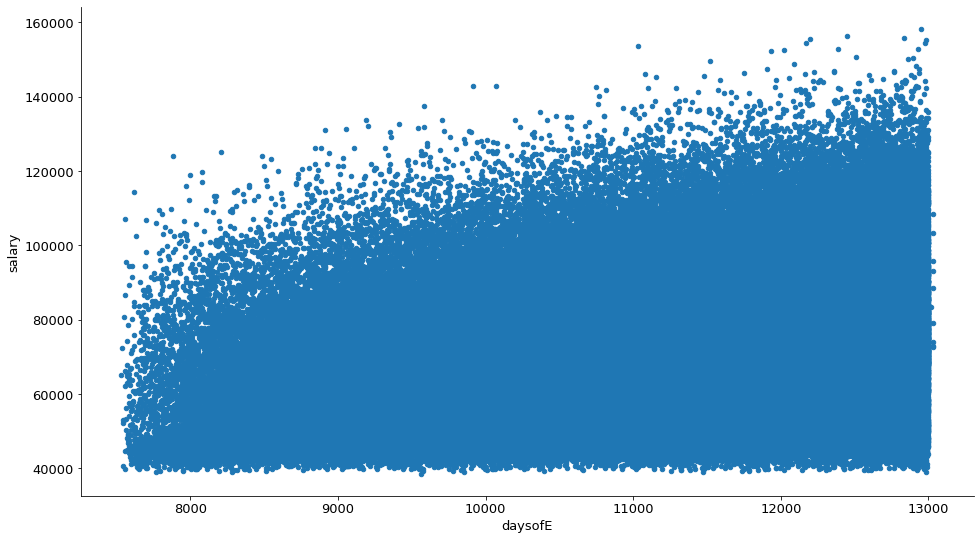

In [58]:
# Is there a relationship between how long an employee has been with the company and their salary?

# PART 3

# Hypothesis
# H0: There is no linear relationship between employee tenure and salary
# Ha: There is a linear relationship between employee tenure and salary

# importing datetime to calculate length of employment
from datetime import * 

# creating new column that holds the amount of days the employee has been with the company
# converting type of new column data to int 
empsals['daysofE'] = datetime.now().date() - empsals.hire_date
empsals['daysofE'] = empsals['daysofE'].astype(str).str.split().str[0].astype(int)

# assigning employee tenure and salary to variables for plotting and later use
x = empsals.daysofE
y = empsals.salary

# plotting data
empsals.plot.scatter(x = 'daysofE', y = 'salary')


In [59]:
# Is there a relationship between how long an employee has been with the company and their salary?

# PART 4

# using pearsonr to find the correlation value and p
r, p = stats.pearsonr(y, x)

#display results
print(r, p)

# Answer: p < alpha so we reject the null hypothesis. 
# With regard to r, because it positive close and closer to 0, there is a weak, positive relationship.

0.30646256131860783 0.0


# QUESTION

In [60]:
# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

# PART 1

# Hypothesis
# H0: There is no linear relationship between employee tenure and the number of titles theyve had
# Ha: There is a linear relationship between employee tenure and the number of titles theyve had

# using read_sql to run query and url to connect to database and get data from titles table
titles = pd.read_sql('SELECT * FROM titles', url)

# converting to dataframe
titles = pd.DataFrame(titles)

# displaying data frame
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


In [61]:
# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

# PART 2

# creating DF that stores each employee number along with the number of titles they've had
titles_count = titles.groupby('emp_no').title.agg('count')

# merging title count table with earlier table that includes days of employment for each employee
titles_count_df = pd.merge(empsals, titles_count, left_on = 'emp_no', right_on='emp_no')

titles_count_df


,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,daysofE,title
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,12491,1
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,12708,1
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,12428,1
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,12333,2
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,94692,2001-09-09,9999-01-01,11317,2
...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,10099,1
240120,499996,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,10937,2
240121,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,12557,2
240122,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,9825,2


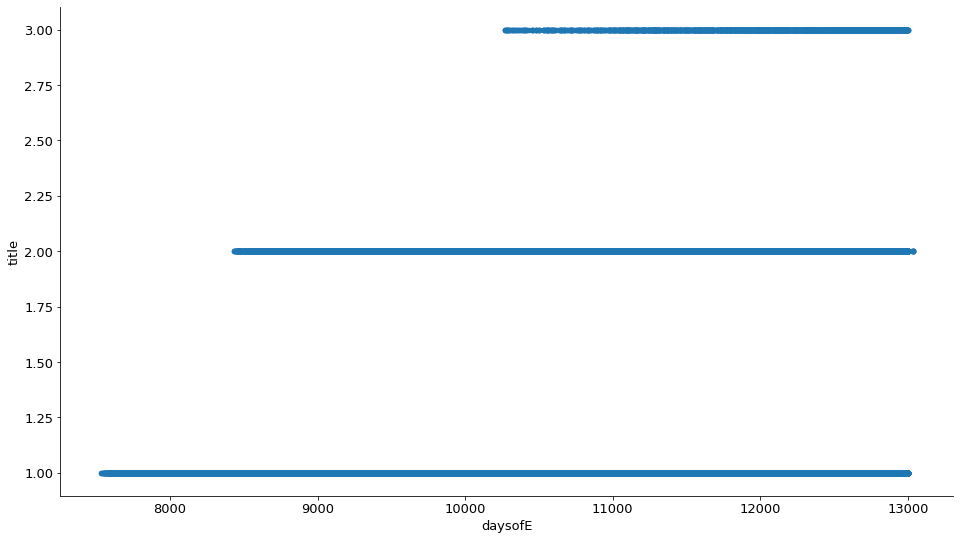

In [62]:
# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

# PART 3

# plotting data
titles_count_df.plot.scatter(x = 'daysofE', y = 'title')

In [63]:
# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

# PART 4

#setting x and y for pearsonr 
y = titles_count_df.title
x = titles_count_df.daysofE

# using pearsonr to find the correlation value and p
r, p = stats.pearsonr(y, x)

#display results
print(r, p)

# Answer: p < alpha so we reject the null hypothesis.  
# With regard to r, because it positive close and closer to 0, there is a weak, positive relationship between
# number of titles and employee tenure

0.2871267889699719 0.0


# QUESTION

In [64]:
# Use the sleepstudy data. 

from pydataset import data
sleep = data('sleepstudy')
df = pd.DataFrame(sleep)

df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [65]:
# Is there a relationship between days and reaction time?

# Hypothesis
# H0: There is no linear relationship between days without sleep and reaction time
# Ha: There is a linear relationship between days without sleep and reaction time

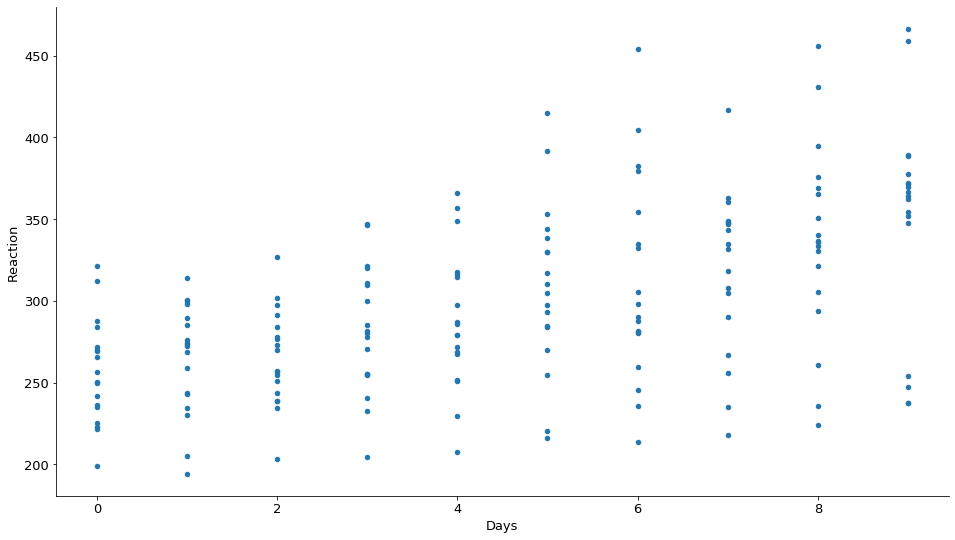

In [66]:
# plotting data

df.plot.scatter(x = 'Days', y = 'Reaction')

In [67]:
#setting x and y for pearsonr 
y = df.Reaction
x = df.Days

# using pearsonr to find the correlation value and p
r, p = stats.pearsonr(y, x)

# display results
print(r, p)

# Answer: p < alpha so we reject the null hypothesis.  
# With regard to r, because it is positive and midway between 0 and 1, there is a moderate, positive 
# relationship between days without sleep and reaction time

0.5352302262650253 9.894096322214812e-15


# CHI

# QUESTION

In [68]:
# Use the following contingency table to help answer the question of whether using a macbook 
# and being a codeup student are independent of each other.

index = ['Uses a MB', 'Doesnt use a MB']
columns = ['Codeup Student', 'Not Codeup Student']

observed = pd.DataFrame([[49, 20], [1, 30]], index = index, columns = columns)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(chi2)
print(p)
print(degf)
print(expected)

36.65264142122487
1.4116760526193828e-09
1
[[34.5 34.5]
 [15.5 15.5]]


# QUESTION

In [69]:
# Choose another 2 categorical variables from the mpg dataset and perform a chi2
# contingency table test with them. Be sure to state your null and alternative hypotheses.

# Hypothesis
# H0: Cylinders is independent of transmission type
# Ha: Cylinders is not independent of transmission type

mpg.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,mpg_avg,trans_cat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,auto


In [70]:
# Calculate Expected Proportions (Transmission)

# calculate n, ie. number of rows
n = mpg.shape[0] 

# calculate expected proportions
transmission_props = mpg.trans_cat.value_counts() / n
transmission_props

# We see that auto transmissions account for roughly 67% of all tranmissions
# manual make up about 33%


auto      0.67094
manual    0.32906
Name: trans_cat, dtype: float64

In [71]:
# Calculate Expected Proportions (EP's) (Cylinders Types)

# calculate expected proportions
cyl_props = mpg.cyl.value_counts() / n
cyl_props

# We note the percent of each cyclinder count
# 4 cyl = 34%
# 6 cyl = 33%
# 8 cyl = 29%
# 5 cyl = 1%

4    0.346154
6    0.337607
8    0.299145
5    0.017094
Name: cyl, dtype: float64

In [72]:
# Sidenote
# We can find the expected percent of any combination of cylinder | transmission by multiplying their EP's

# Example
# What percent of all vehicles do we expect are automatic, 4 cylinders?
# .67 * .34 = .22
# We expect 22% of all vehicles to be automatic 4 cylinders

In [73]:
# Create DF with all EP's

# empty DF
expected = pd.DataFrame()

# iterating through our two EP's series and creating DF that holds their products from one another
for transmission_group, t_prop in transmission_props.iteritems():
    for cyl_group, cyl_prop in cyl_props.iteritems():
        expected.loc[cyl_group, transmission_group] = t_prop * cyl_prop

# sorting by index, ie. cylinder number
expected.sort_index(inplace=True)
expected

,auto,manual
4,0.232249,0.113905
5,0.011469,0.005625
6,0.226514,0.111093
8,0.200709,0.098437


In [74]:
# Calculate expected number of vules via multiply EV's by n (ie. observations, rows, etc)

# expected number of values
expected *= n
expected

,auto,manual
4,54.346154,26.653846
5,2.683761,1.316239
6,53.004274,25.995726
8,46.965812,23.034188


In [75]:
# calculate actual propotions

# calculate actual proportions into DF using crosstab
observed = pd.crosstab(mpg.cyl, mpg.trans_cat)

observed

trans_cat,auto,manual
cyl,,
4,41,40
5,2,2
6,56,23
8,58,12


In [76]:
# calculate test statistic, x**2

chi2 = ((observed - expected) ** 2 / expected).values.sum()

chi2

18.88230458338151

In [77]:
# calculate degrees of freed

# using shape to get number of rows and cols from observed pd
nrows, ncols = observed.shape

# calculating degrees of freedom
degf = (nrows - 1) * (ncols - 1)

degf

3

In [78]:
# claculating p value

stats.chi2(degf).sf(chi2)

# since p value is far under alpha, we reject null hypothesis

0.00028915357257799354

In [79]:
# Alternate approach
chi22, p2, degf2, expected2 = stats.chi2_contingency(observed)

print(chi22)
print(p2)
print(degf2)
print(expected2)

18.88230458338151
0.00028915357257799354
3
[[54.34615385 26.65384615]
 [ 2.68376068  1.31623932]
 [53.0042735  25.9957265 ]
 [46.96581197 23.03418803]]


# QUESTION

In [80]:
# Use the data from the employees database to answer these questions:

In [81]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

# Hypothesis
# H0: Gender is independent from whether an employee works in sales or marketing
# Ha: Gender is not independent from whether an employee works in sales or marketing

# PART 1 

# Connecting to dept_emp database

# using read_sql to run query and url to connect to database
dept_emp = pd.read_sql('SELECT * FROM dept_emp', url)

# converting to Dataframe
dept_emp = pd.DataFrame(dept_emp)

# displaying data frame
dept_emp.head(5)

,emp_no,dept_no,from_date,to_date
0,10001,d005,1986-06-26,9999-01-01
1,10002,d007,1996-08-03,9999-01-01
2,10003,d004,1995-12-03,9999-01-01
3,10004,d004,1986-12-01,9999-01-01
4,10005,d003,1989-09-12,9999-01-01


In [82]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

# PART 2

# Connecting to departments database

# using read_sql to run query and url to connect to database
depts = pd.read_sql('SELECT * FROM departments', url)

# converting to Dataframe
depts = pd.DataFrame(depts)

# displaying data frame
depts.head(5)

,dept_no,dept_name
0,d009,Customer Service
1,d005,Development
2,d002,Finance
3,d003,Human Resources
4,d001,Marketing


In [83]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

# PART 3

# merging departments and dept_emp DFs
dept_name_w_emp = pd.merge(dept_emp, depts, left_on = 'dept_no', right_on='dept_no')

dept_name_w_emp

,emp_no,dept_no,from_date,to_date,dept_name
0,10001,d005,1986-06-26,9999-01-01,Development
1,10006,d005,1990-08-05,9999-01-01,Development
2,10008,d005,1998-03-11,2000-07-31,Development
3,10012,d005,1992-12-18,9999-01-01,Development
4,10014,d005,1993-12-29,9999-01-01,Development
...,...,...,...,...,...
331598,499950,d002,1999-02-02,2000-02-23,Finance
331599,499975,d002,1996-10-19,1997-07-23,Finance
331600,499977,d002,1999-12-28,9999-01-01,Finance
331601,499989,d002,1996-10-29,2001-03-07,Finance


In [84]:
# Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
    
# PART 4

# merging new dept and employee DF with employees DF from previous question since it contains only current employees
dept_name_emp_current = pd.merge(dept_name_w_emp, empsals, left_on = 'emp_no', right_on='emp_no')

# creating DF that only contains sales and marketing employees
sales_marketing_emps = dept_name_emp_current[(dept_name_emp_current.dept_name == 'Sales') | (dept_name_emp_current.dept_name == 'Marketing')] 

sales_marketing_emps

,emp_no,dept_no,from_date_x,to_date_x,dept_name,birth_date,first_name,last_name,gender,hire_date,salary,from_date_y,to_date_y,daysofE
77497,10002,d007,1996-08-03,9999-01-01,Sales,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,12708
77498,10016,d007,1998-02-11,9999-01-01,Sales,1961-05-02,Kazuhito,Cappelletti,M,1995-01-27,77935,2002-02-10,9999-01-01,9354
77499,10041,d007,1989-11-12,9999-01-01,Sales,1959-08-27,Uri,Lenart,F,1989-11-12,81705,2001-11-09,9999-01-01,11256
77500,10050,d007,1992-11-05,9999-01-01,Sales,1958-05-21,Yinghua,Dredge,M,1990-12-25,97830,2001-12-22,9999-01-01,10848
77502,10053,d007,1994-11-13,9999-01-01,Sales,1954-09-13,Sanjiv,Zschoche,F,1986-02-04,78478,2001-11-11,9999-01-01,12633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253576,499879,d001,1995-04-18,9999-01-01,Marketing,1958-12-31,Stafford,Goodrum,M,1995-04-18,69634,2002-04-16,9999-01-01,9273
253577,499884,d001,1990-05-13,9999-01-01,Marketing,1961-03-15,Adhemar,Gist,F,1988-11-19,92205,2002-05-10,9999-01-01,11614
253578,499934,d001,1993-02-21,9999-01-01,Marketing,1957-02-19,Tonia,Butner,F,1991-01-02,76837,2002-02-19,9999-01-01,10840
253579,499968,d001,1991-10-08,9999-01-01,Marketing,1959-03-07,Dharmaraja,Ertl,M,1991-10-08,89119,2001-10-05,9999-01-01,10561


In [85]:
# creating contingency table of marketing and sales dept employee counts per male and female
observed = pd.crosstab(sales_marketing_emps.dept_name, sales_marketing_emps.gender)

observed

gender,F,M
dept_name,,
Marketing,6429,9823
Sales,16698,25302


In [86]:
# use chi2_contingency function to find p
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(chi2)
print(p)
print(degf)
print(expected)

# the large p value (.66) means we do not reject the null hypothesis

0.18548924445258216
0.6666977011651685
1
[[ 6452.31071895  9799.68928105]
 [16674.68928105 25325.31071895]]


# QUESTION

In [89]:
# Is an employee's gender independent of whether or not they are or have been a manager?

# Connecting to dept manager database

# using read_sql to run query and url to connect to database
mgrs = pd.read_sql('SELECT * FROM dept_manager', url)

# converting to Dataframe
mgrs_df = pd.DataFrame(mgrs)

mgrs_df

,emp_no,dept_no,from_date,to_date
0,110022,d001,1985-01-01,1991-10-01
1,110039,d001,1991-10-01,9999-01-01
2,110085,d002,1985-01-01,1989-12-17
3,110114,d002,1989-12-17,9999-01-01
4,110183,d003,1985-01-01,1992-03-21
5,110228,d003,1992-03-21,9999-01-01
6,110303,d004,1985-01-01,1988-09-09
7,110344,d004,1988-09-09,1992-08-02
8,110386,d004,1992-08-02,1996-08-30
9,110420,d004,1996-08-30,9999-01-01


In [161]:
# performing outer join, info from manager df will be missing in resulting DF if an employee was never a manager
mgr_emp = pd.merge(mgrs_df, empsals, how = 'outer', left_on = 'emp_no', right_on='emp_no')

In [162]:
# adding column that will hold true or false if employee was ever a manager
# this value is assigned based on whether there is non null data in the dept_no column (a column from the manager DF)
mgr_emp['manager'] = mgr_and_emp.dept_no.notna()

mgr_emp

,emp_no,dept_no,from_date_x,to_date_x,birth_date,first_name,last_name,gender,hire_date,salary,from_date_y,to_date_y,daysofE,manager
0,110022,d001,1985-01-01,1991-10-01,1956-09-12,Margareta,Markovitch,M,1985-01-01,108407,2001-12-28,9999-01-01,13032,True
1,110039,d001,1991-10-01,9999-01-01,1963-06-21,Vishwani,Minakawa,M,1986-04-12,106491,2002-04-08,9999-01-01,12566,True
2,110085,d002,1985-01-01,1989-12-17,1959-10-28,Ebru,Alpin,M,1985-01-01,88443,2001-12-28,9999-01-01,13032,True
3,110114,d002,1989-12-17,9999-01-01,1957-03-28,Isamu,Legleitner,F,1985-01-14,83457,2002-01-10,9999-01-01,13019,True
4,110183,d003,1985-01-01,1992-03-21,1953-06-24,Shirish,Ossenbruggen,F,1985-01-01,79229,2001-12-28,9999-01-01,13032,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240119,499995,NaN,NaN,NaN,1958-09-24,Dekang,Lichtner,F,1993-01-12,52868,2002-06-01,9999-01-01,10099,False
240120,499996,NaN,NaN,NaN,1953-03-07,Zito,Baaz,M,1990-09-27,69501,2002-05-12,9999-01-01,10937,False
240121,499997,NaN,NaN,NaN,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,12557,False
240122,499998,NaN,NaN,NaN,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,9825,False


In [163]:
# created cross tab that shows counts for each male / female and whether of not they have ever been a manager 
# true = been or is a Manager, false = never been a manager
observed = pd.crosstab(mgr_emp.manager, mgr_emp.gender)

observed

gender,F,M
manager,,
False,95997,144103
True,13,11


In [164]:
# use chi2_contingency function to find p
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(chi2)
print(p)
print(degf)
print(expected)

# the large p value (.22) means we do not reject the null hypothesis

1.4644053674773516
0.22623047939647867
1
[[9.60004040e+04 1.44099596e+05]
 [9.59604204e+00 1.44039580e+01]]
